In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
len(X_train),
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

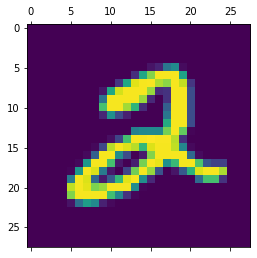

In [6]:
#first trained image
plt.matshow(X_train[5])

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
X_train= X_train / 255
X_test =X_test /255

In [9]:
#fatten into 1D
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [11]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
#create a simple neuron
model = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation= 'sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4721 - accuracy: 0.8767: 0s - loss: 0.4934 - accu
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2828 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9269


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 924us/step - loss: 0.2689 - accuracy: 0.9253


[0.2689052224159241, 0.9253000020980835]

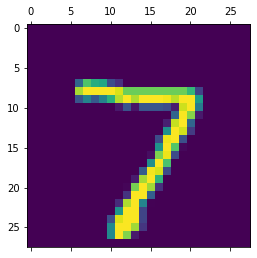

In [14]:
#let's predict the first image
plt.matshow(X_test[0])

In [15]:
y_predicted =  model.predict(X_test_flattened)
y_predicted[0]

array([2.5199503e-02, 2.6549287e-07, 6.7679673e-02, 9.5730126e-01,
       3.0981898e-03, 1.0578549e-01, 1.9210904e-06, 9.9976897e-01,
       1.0365310e-01, 6.3708246e-01], dtype=float32)

In [16]:
np.argmax(y_predicted[0])

7

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
#confusion matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,    9,  928,   15,   10,    4,   13,    8,   36,    3],
       [   4,    0,   22,  903,    1,   34,    2,   10,   25,    9],
       [   2,    1,    2,    2,  928,    0,   11,    3,   10,   23],
       [  10,    3,    3,   22,   10,  790,   15,    4,   28,    7],
       [  13,    3,    7,    1,    7,   10,  912,    2,    3,    0],
       [   1,    7,   23,    7,    7,    0,    0,  940,    4,   39],
       [   9,   11,    6,   17,    9,   29,    9,   10,  867,    7],
       [  11,    7,    1,    8,   44,    7,    0,   21,    6,  904]])>

In [20]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

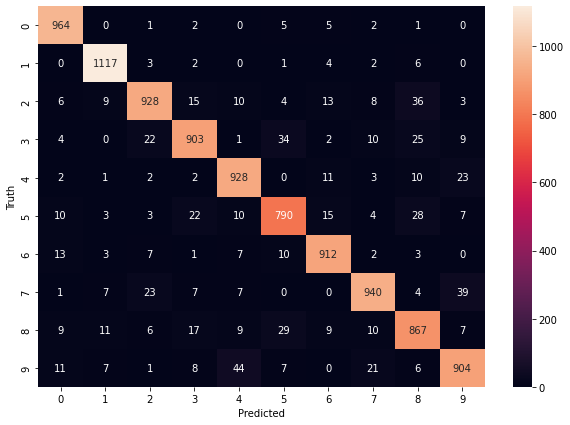

In [21]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
#same model by adding the hidden layers which usually improves the score
#create a simple neuron

model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2697 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1241 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0867 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0661 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9832


In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0810 - accuracy: 0.9746


[0.08099103718996048, 0.9746000170707703]

In [32]:
 %%latex
    $\textbf{using Flatten layer so that we don't have to call .reshape on input dataset}$

<IPython.core.display.Latex object>

In [24]:
#assuming we dont want to flatten the X_train, Keras has its own flatten module

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2802 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1289 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0893 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0685 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0533 - accuracy: 0.9836


In [38]:
%%latex

$\textbf{tensorflowboard - tensorflow callback}$


<IPython.core.display.Latex object>

In [39]:


#assuming we dont want to flatten the X_train, Keras has its own flatten module

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation= 'relu'), #hiden layer
    keras.layers.Dense(10, activation= 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(optimizer='SGD', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6440 - accuracy: 0.8390
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3360 - accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2885 - accuracy: 0.9190
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2591 - accuracy: 0.9270
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2369 - accuracy: 0.9335


In [45]:
#visualize tensorboard

%reload_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 29544), started 0:41:13 ago. (Use '!kill 29544' to kill it.)